In [2]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

In [3]:
airline_df = pd.read_csv('airline.csv')
airline_df.head()

,satisfaction,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,...,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,dissatisfied,Loyal Customer,48,Personal Travel,Eco,4001,1,1,1,1,...,1,1,4,1,1,4,2,1,16,0
1,dissatisfied,Loyal Customer,48,Personal Travel,Eco,3980,1,1,1,1,...,4,4,2,3,2,3,2,4,0,0
2,dissatisfied,Loyal Customer,40,Personal Travel,Eco,2251,1,1,1,1,...,1,1,3,3,2,1,1,1,0,8
3,dissatisfied,Loyal Customer,46,Personal Travel,Eco,2453,1,1,1,1,...,5,3,1,4,1,2,2,3,3,15
4,dissatisfied,Loyal Customer,63,Personal Travel,Eco,2011,1,1,1,1,...,5,5,1,5,2,1,2,5,25,25


In [4]:
airline_df.dropna(inplace = True)
airline_df.columns

Index(['satisfaction', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'seat_comfort', 'departure_arrival_time_convenient',
       'food_and_drink', 'gate_location', 'inflight_wifi_service',
       'inflight_entertainment', 'online_support', 'ease_of_online_booking',
       'on-board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes'],
      dtype='object')

In [5]:
# Output column for prediction
output = airline_df['satisfaction'] 

# Input features (excluding year column)
features = airline_df[['customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'seat_comfort', 'departure_arrival_time_convenient',
       'food_and_drink', 'gate_location', 'inflight_wifi_service',
       'inflight_entertainment', 'online_support', 'ease_of_online_booking',
       'on-board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes']]

cat_var = ['customer_type', 'type_of_travel', 'class']
features_encoded = pd.get_dummies(features, columns = cat_var)

features_encoded.head()

,age,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,...,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,class_Business,class_Eco,class_Eco Plus
0,48,4001,1,1,1,1,1,1,1,1,...,1,16,0,True,False,False,True,False,True,False
1,48,3980,1,1,1,1,4,1,4,4,...,4,0,0,True,False,False,True,False,True,False
2,40,2251,1,1,1,1,1,1,1,1,...,1,0,8,True,False,False,True,False,True,False
3,46,2453,1,1,1,1,3,1,5,3,...,3,3,15,True,False,False,True,False,True,False
4,63,2011,1,1,1,1,5,1,5,5,...,5,25,25,True,False,False,True,False,True,False


In [6]:
train_X, test_X, train_y, test_y = train_test_split(features_encoded, output, test_size = 0.2, random_state = 1) 

In [10]:
train_X.columns

Index(['age', 'flight_distance', 'seat_comfort',
       'departure_arrival_time_convenient', 'food_and_drink', 'gate_location',
       'inflight_wifi_service', 'inflight_entertainment', 'online_support',
       'ease_of_online_booking', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'customer_type_Loyal Customer', 'customer_type_disloyal Customer',
       'type_of_travel_Business travel', 'type_of_travel_Personal Travel',
       'class_Business', 'class_Eco', 'class_Eco Plus'],
      dtype='object')

In [7]:
# Defining prediction model
clf = DecisionTreeClassifier(random_state = 0)

# Fitting model on training data
clf.fit(train_X, train_y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(decision_tree = clf,
                   max_depth = None,
                   feature_names = train_X.columns,
                   class_names = clf.classes_,
                   filled = True)

# Saving Decision Tree
fig.savefig("dt_visual.svg", bbox_inches = 'tight')

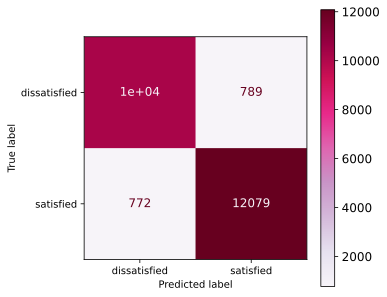

In [8]:
# Predictions on test set
y_pred = clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax)

# Save as SVG
plt.savefig("confusion_mat.svg", bbox_inches = 'tight');

In [9]:
dt_pickle = open('dt_airline.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf, dt_pickle) 

# Close the file
dt_pickle.close() 